In [1]:
# importing module
from pandas import *
 
# reading CSV file
data = read_csv("dataset2.csv")
 
# converting column data to list
price = data['price'].tolist()
weight = data['weight'].tolist()
 
# printing list data
print('weight:', weight)
print('price:', price)

weight: [485, 326, 248, 421, 322, 795, 43, 845, 955, 252, 9, 901, 122, 94, 738, 574, 715, 882, 367, 984, 299, 433, 682, 72, 874, 138, 856, 145, 995, 529, 199, 277, 97, 719, 242, 107, 122, 70, 98, 600, 645, 267, 972, 895, 213, 748, 487, 923, 29, 674, 540, 554, 467, 46, 710, 553, 191, 724, 730, 988, 90, 340, 549, 196, 865, 678, 570, 936, 722, 651, 123, 431, 508, 585, 853, 642, 992, 725, 286, 812, 859, 663, 88, 179, 187, 619, 261, 846, 192, 261, 514, 886, 530, 849, 294, 799, 391, 330, 298, 790, 275, 826, 72, 866, 951, 748, 685, 956, 564, 183, 400, 721, 207, 323, 611, 116, 109, 795, 343, 862, 685, 10, 881, 984, 403, 360, 449, 541, 272, 877, 359, 707, 308, 770, 30, 208, 311, 100, 939, 422, 785, 370, 989, 969, 143, 972, 28, 61, 638, 348, 347, 66, 391, 638, 295, 826, 196, 449, 855, 143, 487, 140, 564, 615, 135, 564, 360, 793, 163, 859, 760, 711, 662, 159, 660, 268, 948, 315, 676, 341, 689, 894, 706, 490, 478, 671, 932, 899, 237, 187, 472, 772, 98, 906, 911, 635, 225, 823, 164, 343, 732, 502, 

In [2]:
print(type(price))

<class 'list'>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, tools, creator, algorithms
import random

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

geneLength = 500
toolbox = base.Toolbox()
toolbox.register('genBinary', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual,toolbox.genBinary, geneLength)

weightList = weight
valueList = price

def evaluate(ind):
    return (np.sum(np.asarray(valueList)*np.asarray(ind))),
toolbox.register('evaluate', evaluate)

def feasiblity(i, W=200000):
    Tweight = np.sum(np.asarray(weight)*np.asarray(i))
    if Tweight <= W:
        return True
    return False

toolbox.decorate('evaluate', tools.DeltaPenalty(feasiblity, -10))
toolbox.register('select', tools.selTournament, tournsize=2)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.5)

popSize = 100
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
pop = toolbox.population(popSize)

stats = tools.Statistics(key=lambda i:i.fitness.values)
stats.register('max', np.max)
stats.register('avg', np.mean)
stats.register('std', np.std)
logbook = tools.Logbook()
logbook.header = ['gen', 'nevals'] + (stats.fields)

invalid_ind = [i for i in pop if not i.fitness.valid]
fitnessFun = toolbox.map(toolbox.evaluate, invalid_ind)
for fitness, i in zip(fitnessFun, invalid_ind):
    i.fitness.values = fitness

record = stats.compile(pop)
logbook.record(gen=0, nevals=len(invalid_ind),**record)

ngen = 400
cxpb = 0.8
mutpb = 0.2

for gen in range(1, ngen+1):

    offspring = toolbox.select(pop, popSize)
    offspring = [toolbox.clone(_) for _ in offspring]

    for i1, i2 in zip(offspring[::2], offspring[1::2]):
        if random.random()<cxpb:
            toolbox.mate(i1, i2)
            del i1.fitness.values
            del i2.fitness.values

    for i in offspring:
        if random.random()<mutpb:
            toolbox.mutate(i)
            del i.fitness.values

    invalid_ind = [i for i in offspring if not i.fitness.valid]
    fitnessFun = toolbox.map(toolbox.evaluate, invalid_ind)
    for fitness, i in zip(fitnessFun, invalid_ind):
        i.fitness.values = fitness

    combindPop = pop + offspring
    pop = tools.selBest(combindPop, popSize)

    record = stats.compile(pop)
    logbook.record(gen = gen, nevals = len(invalid_ind), **record)
print(logbook)

gen	nevals	max   	avg   	std    
0  	100   	144205	130001	6611.68
1  	83    	147921	136565	3774.92
2  	84    	150259	140856	2849.03
3  	86    	153210	144205	2619.14
4  	92    	153210	147067	2132.99
5  	78    	155711	149584	1978.06
6  	85    	156758	151637	1802.91
7  	88    	158811	153898	1918.92
8  	85    	161615	155946	1611.78
9  	78    	163769	157851	1605.82
10 	80    	163769	159688	1487.12
11 	75    	167758	161388	1508.09
12 	93    	168949	163155	1334.55
13 	85    	168949	164412	1249.79
14 	87    	170666	165801	1315.45
15 	87    	170666	167048	1192.17
16 	90    	171505	168405	1063   
17 	87    	173451	169820	1108.79
18 	83    	173937	170907	1039.69
19 	87    	176688	171976	1130.98
20 	78    	176688	173089	1064.7 
21 	82    	178319	174300	1121.28
22 	78    	179918	175501	1178.22
23 	85    	181347	176703	1237.24
24 	89    	181946	178032	1319.21
25 	73    	182016	179263	1090.27
26 	94    	184110	180552	1149.35
27 	84    	185345	181761	919.359
28 	89    	186102	182753	920.07 
29 	79    

Best Solution: [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 

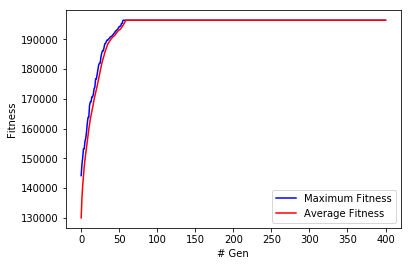

In [4]:
best = tools.selBest(pop,1)[0]
finalFit = best.fitness.values[0]
Tweight = np.sum(np.asarray(weight)*np.asarray(best))
print('Best Solution: '+str(best))
print('Best Fitness: '+str(finalFit))
print('Sum of Weight: '+str(Tweight))

maxFit = logbook.select('max')
avgFit = logbook.select('avg')
plt.plot(maxFit, 'b-', label='Maximum Fitness')
plt.plot(avgFit, 'r-', label='Average Fitness')
plt.xlabel('# Gen')
plt.ylabel('Fitness')
plt.legend(loc='best')

In [5]:
from random import random
import random
import math

import matplotlib.pyplot as plt
import matplotlib 

In [6]:
prices = data['price'].to_numpy()
weights = data['weight'].to_numpy()
items = len(data)
capacity = 200000

In [9]:
def calculate(knapsack):
    list = np.array(knapsack)
    arrWeight = np.array(weights)
    arrPrice = np.array(prices)
    itemWeight = np.dot(list, arrWeight)
    itemValue = np.dot(list, arrPrice)

    
    return [itemWeight-sumWeight, itemWeight] if itemWeight > sumWeight else [itemValue, itemWeight]

def initiation(population):

    np.random.seed(1)
    knapsack = np.random.binomial(1, population, size=items)
    return knapsack

def neighborAl(knapsack):
    nbh = []
    for i in range(0, items):
        exchange = list(knapsack)
        nbh.append(exchange)
        (nbh[i][i]) = 0 if nbh[i][i] == 1 else 1
    return nbh

In [10]:
def simulatedAnn(population, temperature, iterations, finalT):

    currentVal = initiation(population)
    bestCap = currentVal[:]
    currentRes = calculate(currentVal)[:]
    bestRes = currentRes[:]
    
    solutions = 0
    improvementsAll = 0
    randomSum = 0

    a = 0

    while (temperature/(a+1) > finalT):
        ranSteps = 0
        improvements = 0
        y = 0
        
        while (y < iterations):
            solutions += 1
            NBH = neighborAl(currentVal)
            z = NBH[random.randint(0, len(NBH)-1)]
            if (calculate(z)[0] > currentRes[0]):
                improvements += 1
                currentVal = z[:]
                currentRes = calculate(z)[:]
            else:
                omega = calculate(currentVal)[0] - calculate(z)[0]
                ranVal = math.exp(-1 * omega * (a+1) / (temperature))
                odds = random.uniform(0,1)
                if (odds < ranVal):
                    ranSteps += 1
                    currentVal = z[:]
                    currentRes = calculate(z)[:]      

            if(currentRes[0] > bestRes[0]):
                bestRes = currentRes[:]
                bestCap = currentVal[:]
            y += 1

        a += 1
        improvementsAll += improvements
        randomSum += ranSteps

    sol = np.array(bestCap)
    intemWeight = bestRes[1]
    itemValue = bestRes[0]

    return sol, itemValue, intemWeight

In [11]:
def excuteSAS(runNums, population,temperature, iterations,  finalT):
    arrVal = []
    arrWei = []
    for i in range(runNums):
        knapsack, itemValue, intemWeight = simulatedAnn(population,temperature, iterations, finalT)
        print("\nTotal value: %0.1f " % itemValue)
        print("Total weight: %0.1f " % intemWeight)
        arrVal.append(itemValue)
        arrWei.append(intemWeight)
    return arrVal, arrWei

In [12]:
def graphGenerator(arrVal, arrWei, name, runNums):
    fig,ax = plt.subplots(figsize=(10,8))
    
    ax2=ax.twinx()
    ax2.plot(range(1,11),arrWei,color="blue",marker="x")
    ax2.set_ylabel('Final total weight of knapsack',color="black",fontsize=15)
    
    ax.plot(range(1,11),arrVal, color="orange", marker="o")
    ax.set_xlabel('Number of runs of the ' + str(name),fontsize=15)
    ax.set_ylabel('Final total value of knapsack',color="black",fontsize=15)
    
    plt.title("Final total value and weight of knapsack in " + str(runNums)+ " runs",fontsize=18)
    plt.xticks(np.arange(1, 11, 1.0))
    plt.show()
    avg_v_total = np.mean(arrVal)
    avg_w_total = np.mean(arrWei)

In [13]:
finalT = 5
iterations = 50
temperature = 20000
population = 0.1
runNums = 10

name = "Simulated Annealing"
arrVal, arrWei = excuteSAS(runNums, population,temperature, iterations,  finalT)

Number of runs of the algorithm = 1

Starting solve() 
Simulated Annealing
Initial Proportion of items: 0.1
Initial temperature: 20000
Final temperature: 5
Number of Iterations: 50
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

Total number of random steps: 3119 
 Total number of improvements: 3423
Number of packings checked: 199950

Best packing found: 
[1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0

Total number of random steps: 2788 
 Total number of improvements: 3081
Number of packings checked: 199950

Best packing found: 
[1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0

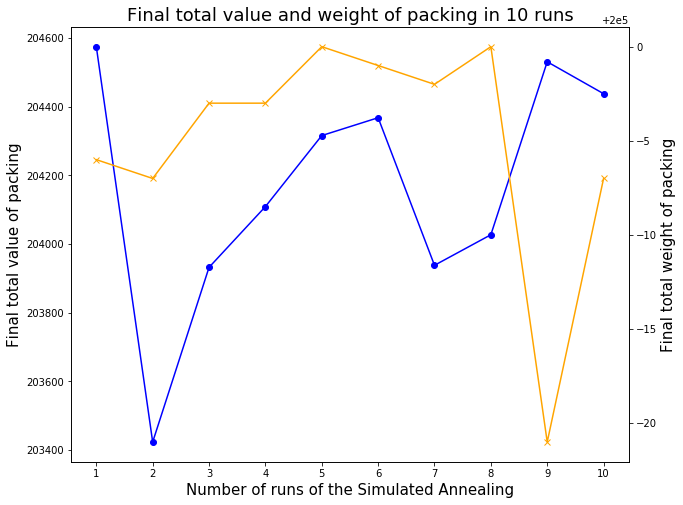


Average total value of packing in 10 runs = 204165.7 

Average total weight of packing in 10 runs = 199995.0 


In [14]:
graphGenerator(arrVal, arrWei, name, runNums)

In [15]:
def tabu(population, tabuTimes, bestStepsMax):
    
    currentVal = initiation(population)
    currentRes = calculate(currentVal)
    
    bestRes = currentRes[:]
    bestSol = currentRes[:]
    bestCap = currentVal[:]
    
    solutions = 0
    tabuList = [0] * items
    count = 0

    while (count < bestStepsMax):
        neighbour = 0
        bestRes[0] = 0
        NBH = neighborAl(currentVal)
        
        for s in NBH:
            solutions += 1
            if (calculate(s)[0] > bestRes[0]) and (tabuList[neighbour]==0):
                currentVal = s[:]
                visitedNei = neighbour
                bestRes = calculate(s)[:]
                
            if (calculate(s)[0] > bestSol[0]):
                currentVal = s[:]
                bestK = s[:]
                bestRes = calculate(s)[:]
                bestSol = calculate(s)[:]
                visitedNei = neighbour
                var = 1
            neighbour += 1

        
        if(var == 1):
            var = 0
            counter = 0
        counter += 1
        for i in range(0,len(tabuList)-1):
            tbl = tabuList[i]
            if(tbl > 0):
                tabuList[i] = tbl - 1
        
        tabuList[visitedNei] = tabuTimes
    
    sol = np.array(bestK)
    itemValue = bestSol[0]
    itemWeight = bestSol[1]

    return sol, itemValue, itemWeight

In [16]:
def excuteTS(runNums, population,tabuTimes, bestStepsMax):
    arrVal = []
    arrWei = []
    for i in range(runNums):
        knapsack, itemValue, itemWeight = tabu(population,tabuTimes, bestStepsMax)
        print("\nTotal value of knapsack = %0.1f " % itemValue)
        print("Total weight of knapsack = %0.1f " % itemWeight)
        arrVal.append(itemValue)
        arrWei.append(itemWeight)
    return arrVal, arrWei

In [17]:
bestStepsMax = 100
tabuTimes = 30
population = 0.1
runNums = 10

name = "Tabu Search"
arrVal, arrWei = excuteTS(runNums, population,tabuTimes, bestStepsMax)

Number of runs of the algorithm = 1

Starting solve() 
Tabu Search
Initial Proportion of items =  0.1
Tabu tenure =  30
Maximum super best steps =  100
Initial Solution:  0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0


Neighbour selected: 57 , Best_value: 120044
Highest total value found: 120044


Neighbour selected: 65 , Best_value: 120819
Highest total value found: 120819


Neighbour selected: 284 , Best_value: 121593
Highest total value found: 121593


Neighbour selected: 246 , Best_value: 122366
Highest total value found: 122366


Neighbour selected: 282 , Best_value: 123138
Highest total value found: 123138


Neighbour selected: 403 , Best_value: 123910
Highest total value found: 123910


Neighbour selected: 394 , Best_value: 124680
Highest total value found: 124680


Neighbour selected: 16 , Best_value: 125446
Highest total value found: 125446


Neighbour selected: 167 , Best_value: 126212
Highest total value found: 126212


Neighbour selected: 275 , Best_value: 126976
Highest total value found: 126976


Neighbour selected: 339 , Best_value: 127740
Highest total value found: 127740


Neighbour selected: 210 , Best_value: 128501
Highest total value found: 128501


Neighbour selected: 478 , Best_

Neighbour selected: 220 , Best_value: 189624
Highest total value found: 189624


Neighbour selected: 355 , Best_value: 190169
Highest total value found: 190169


Neighbour selected: 357 , Best_value: 190709
Highest total value found: 190709


Neighbour selected: 221 , Best_value: 191247
Highest total value found: 191247


Neighbour selected: 85 , Best_value: 191784
Highest total value found: 191784


Neighbour selected: 320 , Best_value: 192321
Highest total value found: 192321


Neighbour selected: 468 , Best_value: 192857
Highest total value found: 192857


Neighbour selected: 242 , Best_value: 193392
Highest total value found: 193392


Neighbour selected: 414 , Best_value: 193927
Highest total value found: 193927


Neighbour selected: 204 , Best_value: 194457
Highest total value found: 194457


Neighbour selected: 442 , Best_value: 194975
Highest total value found: 194975


Neighbour selected: 3 , Best_value: 195492
Highest total value found: 195492


Neighbour selected: 337 , Best_

Neighbour selected: 211 , Best_value: 202490
Highest total value found: 202685


Neighbour selected: 469 , Best_value: 202630
Highest total value found: 202685


Neighbour selected: 216 , Best_value: 202631
Highest total value found: 202685


Neighbour selected: 479 , Best_value: 202453
Highest total value found: 202685


Neighbour selected: 236 , Best_value: 202643
Highest total value found: 202685


Neighbour selected: 134 , Best_value: 202642
Highest total value found: 202685


Neighbour selected: 249 , Best_value: 202765
Highest total value found: 202765


Neighbour selected: 137 , Best_value: 202606
Highest total value found: 202765


Neighbour selected: 446 , Best_value: 202787
Highest total value found: 202787


Neighbour selected: 266 , Best_value: 202504
Highest total value found: 202787


Neighbour selected: 452 , Best_value: 202775
Highest total value found: 202787


Neighbour selected: 156 , Best_value: 202494
Highest total value found: 202787


Neighbour selected: 317 , Be

Neighbour selected: 382 , Best_value: 202328
Highest total value found: 202793


Neighbour selected: 48 , Best_value: 202329
Highest total value found: 202793


Neighbour selected: 249 , Best_value: 202206
Highest total value found: 202793


Neighbour selected: 134 , Best_value: 202207
Highest total value found: 202793


Neighbour selected: 446 , Best_value: 202026
Highest total value found: 202793


Neighbour selected: 137 , Best_value: 202185
Highest total value found: 202793


Neighbour selected: 379 , Best_value: 202147
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202223
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202277
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202265
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202332
Highest total value found: 202793


Number of packings checked: 208500

Best packing found: 
[0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 

Neighbour selected: 17 , Best_value: 96579
Highest total value found: 96579


Neighbour selected: 140 , Best_value: 97436
Highest total value found: 97436


Neighbour selected: 244 , Best_value: 98291
Highest total value found: 98291


Neighbour selected: 155 , Best_value: 99145
Highest total value found: 99145


Neighbour selected: 388 , Best_value: 99996
Highest total value found: 99996


Neighbour selected: 11 , Best_value: 100834
Highest total value found: 100834


Neighbour selected: 306 , Best_value: 101662
Highest total value found: 101662


Neighbour selected: 350 , Best_value: 102490
Highest total value found: 102490


Neighbour selected: 328 , Best_value: 103317
Highest total value found: 103317


Neighbour selected: 424 , Best_value: 104139
Highest total value found: 104139


Neighbour selected: 293 , Best_value: 104960
Highest total value found: 104960


Neighbour selected: 197 , Best_value: 105778
Highest total value found: 105778


Neighbour selected: 486 , Best_value: 10

Neighbour selected: 185 , Best_value: 173150
Highest total value found: 173150


Neighbour selected: 15 , Best_value: 173777
Highest total value found: 173777


Neighbour selected: 29 , Best_value: 174400
Highest total value found: 174400


Neighbour selected: 178 , Best_value: 175019
Highest total value found: 175019


Neighbour selected: 114 , Best_value: 175637
Highest total value found: 175637


Neighbour selected: 260 , Best_value: 176255
Highest total value found: 176255


Neighbour selected: 73 , Best_value: 176872
Highest total value found: 176872


Neighbour selected: 49 , Best_value: 177488
Highest total value found: 177488


Neighbour selected: 22 , Best_value: 178100
Highest total value found: 178100


Neighbour selected: 451 , Best_value: 178711
Highest total value found: 178711


Neighbour selected: 429 , Best_value: 179317
Highest total value found: 179317


Neighbour selected: 277 , Best_value: 179917
Highest total value found: 179917


Neighbour selected: 106 , Best_va

Neighbour selected: 236 , Best_value: 202097
Highest total value found: 202566


Neighbour selected: 479 , Best_value: 202275
Highest total value found: 202566


Neighbour selected: 379 , Best_value: 202237
Highest total value found: 202566


Neighbour selected: 134 , Best_value: 202238
Highest total value found: 202566


Neighbour selected: 446 , Best_value: 202057
Highest total value found: 202566


Neighbour selected: 137 , Best_value: 202216
Highest total value found: 202566


Neighbour selected: 496 , Best_value: 201946
Highest total value found: 202566


Neighbour selected: 136 , Best_value: 202343
Highest total value found: 202566


Neighbour selected: 452 , Best_value: 202072
Highest total value found: 202566


Neighbour selected: 156 , Best_value: 202353
Highest total value found: 202566


Neighbour selected: 334 , Best_value: 202352
Highest total value found: 202566


Neighbour selected: 245 , Best_value: 202428
Highest total value found: 202566


Neighbour selected: 347 , Be

Neighbour selected: 198 , Best_value: 202486
Highest total value found: 202793


Neighbour selected: 397 , Best_value: 202717
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202641
Highest total value found: 202793


Neighbour selected: 379 , Best_value: 202679
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202625
Highest total value found: 202793


Neighbour selected: 419 , Best_value: 202624
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202636
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202569
Highest total value found: 202793


Neighbour selected: 334 , Best_value: 202570
Highest total value found: 202793


Neighbour selected: 10 , Best_value: 202569
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202426
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202502
Highest total value found: 202793


Neighbour selected: 215 , Best

Neighbour selected: 471 , Best_value: 68565
Highest total value found: 68565


Neighbour selected: 176 , Best_value: 69500
Highest total value found: 69500


Neighbour selected: 67 , Best_value: 70434
Highest total value found: 70434


Neighbour selected: 122 , Best_value: 71363
Highest total value found: 71363


Neighbour selected: 477 , Best_value: 72291
Highest total value found: 72291


Neighbour selected: 391 , Best_value: 73218
Highest total value found: 73218


Neighbour selected: 7 , Best_value: 74142
Highest total value found: 74142


Neighbour selected: 19 , Best_value: 75065
Highest total value found: 75065


Neighbour selected: 64 , Best_value: 75987
Highest total value found: 75987


Neighbour selected: 250 , Best_value: 76909
Highest total value found: 76909


Neighbour selected: 247 , Best_value: 77826
Highest total value found: 77826


Neighbour selected: 430 , Best_value: 78743
Highest total value found: 78743


Neighbour selected: 389 , Best_value: 79658
Highest total

Neighbour selected: 386 , Best_value: 154044
Highest total value found: 154044


Neighbour selected: 148 , Best_value: 154741
Highest total value found: 154741


Neighbour selected: 172 , Best_value: 155437
Highest total value found: 155437


Neighbour selected: 343 , Best_value: 156133
Highest total value found: 156133


Neighbour selected: 329 , Best_value: 156828
Highest total value found: 156828


Neighbour selected: 163 , Best_value: 157518
Highest total value found: 157518


Neighbour selected: 279 , Best_value: 158208
Highest total value found: 158208


Neighbour selected: 358 , Best_value: 158897
Highest total value found: 158897


Neighbour selected: 333 , Best_value: 159585
Highest total value found: 159585


Neighbour selected: 14 , Best_value: 160261
Highest total value found: 160261


Neighbour selected: 108 , Best_value: 160924
Highest total value found: 160924


Neighbour selected: 252 , Best_value: 161582
Highest total value found: 161582


Neighbour selected: 448 , Bes

Neighbour selected: 446 , Best_value: 202211
Highest total value found: 202230


Neighbour selected: 379 , Best_value: 202249
Highest total value found: 202249


Neighbour selected: 112 , Best_value: 202043
Highest total value found: 202249


Neighbour selected: 266 , Best_value: 202326
Highest total value found: 202326


Neighbour selected: 274 , Best_value: 202107
Highest total value found: 202326


Neighbour selected: 399 , Best_value: 202424
Highest total value found: 202424


Neighbour selected: 364 , Best_value: 202183
Highest total value found: 202424


Neighbour selected: 94 , Best_value: 202565
Highest total value found: 202565


Neighbour selected: 334 , Best_value: 202566
Highest total value found: 202566


Neighbour selected: 473 , Best_value: 202499
Highest total value found: 202566


Neighbour selected: 245 , Best_value: 202423
Highest total value found: 202566


Neighbour selected: 347 , Best_value: 202435
Highest total value found: 202566


Neighbour selected: 426 , Bes

Neighbour selected: 84 , Best_value: 202320
Highest total value found: 202793


Neighbour selected: 379 , Best_value: 202282
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202358
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202346
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202400
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202467
Highest total value found: 202793


Neighbour selected: 419 , Best_value: 202468
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202392
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202535
Highest total value found: 202793


Neighbour selected: 334 , Best_value: 202534
Highest total value found: 202793


Neighbour selected: 10 , Best_value: 202535
Highest total value found: 202793


Neighbour selected: 317 , Best_value: 202274
Highest total value found: 202793


Neighbour selected: 215 , Best_

Neighbour selected: 291 , Best_value: 37111
Highest total value found: 37111


Neighbour selected: 338 , Best_value: 38168
Highest total value found: 38168


Neighbour selected: 487 , Best_value: 39213
Highest total value found: 39213


Neighbour selected: 42 , Best_value: 40253
Highest total value found: 40253


Neighbour selected: 123 , Best_value: 41278
Highest total value found: 41278


Neighbour selected: 276 , Best_value: 42303
Highest total value found: 42303


Neighbour selected: 186 , Best_value: 43312
Highest total value found: 43312


Neighbour selected: 272 , Best_value: 44319
Highest total value found: 44319


Neighbour selected: 499 , Best_value: 45323
Highest total value found: 45323


Neighbour selected: 234 , Best_value: 46325
Highest total value found: 46325


Neighbour selected: 28 , Best_value: 47321
Highest total value found: 47321


Neighbour selected: 441 , Best_value: 48315
Highest total value found: 48315


Neighbour selected: 290 , Best_value: 49308
Highest to

Neighbour selected: 330 , Best_value: 130773
Highest total value found: 130773


Neighbour selected: 219 , Best_value: 131522
Highest total value found: 131522


Neighbour selected: 370 , Best_value: 132266
Highest total value found: 132266


Neighbour selected: 490 , Best_value: 133009
Highest total value found: 133009


Neighbour selected: 69 , Best_value: 133751
Highest total value found: 133751


Neighbour selected: 309 , Best_value: 134492
Highest total value found: 134492


Neighbour selected: 346 , Best_value: 135233
Highest total value found: 135233


Neighbour selected: 233 , Best_value: 135973
Highest total value found: 135973


Neighbour selected: 101 , Best_value: 136711
Highest total value found: 136711


Neighbour selected: 280 , Best_value: 137449
Highest total value found: 137449


Neighbour selected: 324 , Best_value: 138186
Highest total value found: 138186


Neighbour selected: 133 , Best_value: 138920
Highest total value found: 138920


Neighbour selected: 180 , Bes

Neighbour selected: 376 , Best_value: 197522
Highest total value found: 197522


Neighbour selected: 92 , Best_value: 198026
Highest total value found: 198026


Neighbour selected: 286 , Best_value: 198529
Highest total value found: 198529


Neighbour selected: 224 , Best_value: 199030
Highest total value found: 199030


Neighbour selected: 353 , Best_value: 199529
Highest total value found: 199529


Neighbour selected: 162 , Best_value: 200025
Highest total value found: 200025


Neighbour selected: 265 , Best_value: 200520
Highest total value found: 200520


Neighbour selected: 52 , Best_value: 201013
Highest total value found: 201013


Neighbour selected: 150 , Best_value: 201452
Highest total value found: 201452


Neighbour selected: 245 , Best_value: 201528
Highest total value found: 201528


Neighbour selected: 473 , Best_value: 201595
Highest total value found: 201595


Neighbour selected: 281 , Best_value: 201594
Highest total value found: 201595


Neighbour selected: 421 , Best

Neighbour selected: 156 , Best_value: 202494
Highest total value found: 202787


Neighbour selected: 317 , Best_value: 202755
Highest total value found: 202787


Neighbour selected: 379 , Best_value: 202793
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202717
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202729
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202675
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202608
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202465
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202541
Highest total value found: 202793


Neighbour selected: 10 , Best_value: 202540
Highest total value found: 202793


Neighbour selected: 334 , Best_value: 202541
Highest total value found: 202793


Neighbour selected: 121 , Best_value: 202540
Highest total value found: 202793


Neighbour selected: 463 , Best

Neighbour selected: 145 , Best_value: 36053
Highest total value found: 36053


Neighbour selected: 291 , Best_value: 37111
Highest total value found: 37111


Neighbour selected: 338 , Best_value: 38168
Highest total value found: 38168


Neighbour selected: 487 , Best_value: 39213
Highest total value found: 39213


Neighbour selected: 42 , Best_value: 40253
Highest total value found: 40253


Neighbour selected: 123 , Best_value: 41278
Highest total value found: 41278


Neighbour selected: 276 , Best_value: 42303
Highest total value found: 42303


Neighbour selected: 186 , Best_value: 43312
Highest total value found: 43312


Neighbour selected: 272 , Best_value: 44319
Highest total value found: 44319


Neighbour selected: 499 , Best_value: 45323
Highest total value found: 45323


Neighbour selected: 234 , Best_value: 46325
Highest total value found: 46325


Neighbour selected: 28 , Best_value: 47321
Highest total value found: 47321


Neighbour selected: 441 , Best_value: 48315
Highest to

Neighbour selected: 478 , Best_value: 129260
Highest total value found: 129260


Neighbour selected: 191 , Best_value: 130017
Highest total value found: 130017


Neighbour selected: 330 , Best_value: 130773
Highest total value found: 130773


Neighbour selected: 219 , Best_value: 131522
Highest total value found: 131522


Neighbour selected: 370 , Best_value: 132266
Highest total value found: 132266


Neighbour selected: 490 , Best_value: 133009
Highest total value found: 133009


Neighbour selected: 69 , Best_value: 133751
Highest total value found: 133751


Neighbour selected: 309 , Best_value: 134492
Highest total value found: 134492


Neighbour selected: 346 , Best_value: 135233
Highest total value found: 135233


Neighbour selected: 233 , Best_value: 135973
Highest total value found: 135973


Neighbour selected: 101 , Best_value: 136711
Highest total value found: 136711


Neighbour selected: 280 , Best_value: 137449
Highest total value found: 137449


Neighbour selected: 324 , Bes

Neighbour selected: 126 , Best_value: 197017
Highest total value found: 197017


Neighbour selected: 376 , Best_value: 197522
Highest total value found: 197522


Neighbour selected: 92 , Best_value: 198026
Highest total value found: 198026


Neighbour selected: 286 , Best_value: 198529
Highest total value found: 198529


Neighbour selected: 224 , Best_value: 199030
Highest total value found: 199030


Neighbour selected: 353 , Best_value: 199529
Highest total value found: 199529


Neighbour selected: 162 , Best_value: 200025
Highest total value found: 200025


Neighbour selected: 265 , Best_value: 200520
Highest total value found: 200520


Neighbour selected: 52 , Best_value: 201013
Highest total value found: 201013


Neighbour selected: 150 , Best_value: 201452
Highest total value found: 201452


Neighbour selected: 245 , Best_value: 201528
Highest total value found: 201528


Neighbour selected: 473 , Best_value: 201595
Highest total value found: 201595


Neighbour selected: 281 , Best

Neighbour selected: 452 , Best_value: 202775
Highest total value found: 202787


Neighbour selected: 156 , Best_value: 202494
Highest total value found: 202787


Neighbour selected: 317 , Best_value: 202755
Highest total value found: 202787


Neighbour selected: 379 , Best_value: 202793
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202717
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202729
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202675
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202608
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202465
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202541
Highest total value found: 202793


Neighbour selected: 10 , Best_value: 202540
Highest total value found: 202793


Neighbour selected: 334 , Best_value: 202541
Highest total value found: 202793


Neighbour selected: 121 , Best

Best packing found: 
[0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 0

Neighbour selected: 197 , Best_value: 105778
Highest total value found: 105778


Neighbour selected: 486 , Best_value: 106595
Highest total value found: 106595


Neighbour selected: 24 , Best_value: 107408
Highest total value found: 107408


Neighbour selected: 241 , Best_value: 108218
Highest total value found: 108218


Neighbour selected: 255 , Best_value: 109025
Highest total value found: 109025


Neighbour selected: 327 , Best_value: 109829
Highest total value found: 109829


Neighbour selected: 368 , Best_value: 110630
Highest total value found: 110630


Neighbour selected: 95 , Best_value: 111425
Highest total value found: 111425


Neighbour selected: 170 , Best_value: 112218
Highest total value found: 112218


Neighbour selected: 365 , Best_value: 113011
Highest total value found: 113011


Neighbour selected: 315 , Best_value: 113800
Highest total value found: 113800


Neighbour selected: 103 , Best_value: 114588
Highest total value found: 114588


Neighbour selected: 259 , Best

Neighbour selected: 203 , Best_value: 181099
Highest total value found: 181099


Neighbour selected: 307 , Best_value: 181683
Highest total value found: 181683


Neighbour selected: 342 , Best_value: 182266
Highest total value found: 182266


Neighbour selected: 223 , Best_value: 182846
Highest total value found: 182846


Neighbour selected: 383 , Best_value: 183422
Highest total value found: 183422


Neighbour selected: 55 , Best_value: 183997
Highest total value found: 183997


Neighbour selected: 165 , Best_value: 184572
Highest total value found: 184572


Neighbour selected: 50 , Best_value: 185141
Highest total value found: 185141


Neighbour selected: 153 , Best_value: 185709
Highest total value found: 185709


Neighbour selected: 66 , Best_value: 186275
Highest total value found: 186275


Neighbour selected: 62 , Best_value: 186840
Highest total value found: 186840


Neighbour selected: 81 , Best_value: 187403
Highest total value found: 187403


Neighbour selected: 457 , Best_va

Neighbour selected: 347 , Best_value: 202416
Highest total value found: 202566


Neighbour selected: 473 , Best_value: 202483
Highest total value found: 202566


Neighbour selected: 426 , Best_value: 202537
Highest total value found: 202566


Neighbour selected: 53 , Best_value: 202461
Highest total value found: 202566


Neighbour selected: 421 , Best_value: 202604
Highest total value found: 202604


Neighbour selected: 10 , Best_value: 202605
Highest total value found: 202605


Neighbour selected: 48 , Best_value: 202604
Highest total value found: 202605


Neighbour selected: 463 , Best_value: 202645
Highest total value found: 202645


Neighbour selected: 121 , Best_value: 202646
Highest total value found: 202646


Neighbour selected: 23 , Best_value: 202513
Highest total value found: 202646


Neighbour selected: 37 , Best_value: 202661
Highest total value found: 202661


Neighbour selected: 147 , Best_value: 202544
Highest total value found: 202661


Neighbour selected: 262 , Best_va

Neighbour selected: 421 , Best_value: 202426
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202502
Highest total value found: 202793


Neighbour selected: 215 , Best_value: 202256
Highest total value found: 202793


Neighbour selected: 452 , Best_value: 202527
Highest total value found: 202793


Neighbour selected: 121 , Best_value: 202526
Highest total value found: 202793


Neighbour selected: 463 , Best_value: 202485
Highest total value found: 202793


Neighbour selected: 146 , Best_value: 202486
Highest total value found: 202793


Neighbour selected: 37 , Best_value: 202338
Highest total value found: 202793


Neighbour selected: 147 , Best_value: 202455
Highest total value found: 202793


Neighbour selected: 262 , Best_value: 202314
Highest total value found: 202793


Neighbour selected: 151 , Best_value: 202388
Highest total value found: 202793


Neighbour selected: 216 , Best_value: 202387
Highest total value found: 202793


Neighbour selected: 269 , Best

Neighbour selected: 389 , Best_value: 79658
Highest total value found: 79658


Neighbour selected: 318 , Best_value: 80572
Highest total value found: 80572


Neighbour selected: 59 , Best_value: 81484
Highest total value found: 81484


Neighbour selected: 119 , Best_value: 82396
Highest total value found: 82396


Neighbour selected: 93 , Best_value: 83306
Highest total value found: 83306


Neighbour selected: 26 , Best_value: 84214
Highest total value found: 84214


Neighbour selected: 143 , Best_value: 85122
Highest total value found: 85122


Neighbour selected: 392 , Best_value: 86025
Highest total value found: 86025


Neighbour selected: 80 , Best_value: 86925
Highest total value found: 86925


Neighbour selected: 278 , Best_value: 87820
Highest total value found: 87820


Neighbour selected: 344 , Best_value: 88707
Highest total value found: 88707


Neighbour selected: 268 , Best_value: 89593
Highest total value found: 89593


Neighbour selected: 256 , Best_value: 90476
Highest tota

Neighbour selected: 448 , Best_value: 162237
Highest total value found: 162237


Neighbour selected: 75 , Best_value: 162890
Highest total value found: 162890


Neighbour selected: 378 , Best_value: 163543
Highest total value found: 163543


Neighbour selected: 483 , Best_value: 164196
Highest total value found: 164196


Neighbour selected: 77 , Best_value: 164848
Highest total value found: 164848


Neighbour selected: 105 , Best_value: 165499
Highest total value found: 165499


Neighbour selected: 240 , Best_value: 166147
Highest total value found: 166147


Neighbour selected: 39 , Best_value: 166791
Highest total value found: 166791


Neighbour selected: 182 , Best_value: 167435
Highest total value found: 167435


Neighbour selected: 261 , Best_value: 168079
Highest total value found: 168079


Neighbour selected: 363 , Best_value: 168723
Highest total value found: 168723


Neighbour selected: 111 , Best_value: 169360
Highest total value found: 169360


Neighbour selected: 326 , Best_

Neighbour selected: 421 , Best_value: 202238
Highest total value found: 202566


Neighbour selected: 53 , Best_value: 202314
Highest total value found: 202566


Neighbour selected: 10 , Best_value: 202313
Highest total value found: 202566


Neighbour selected: 463 , Best_value: 202272
Highest total value found: 202566


Neighbour selected: 48 , Best_value: 202273
Highest total value found: 202566


Neighbour selected: 37 , Best_value: 202125
Highest total value found: 202566


Neighbour selected: 23 , Best_value: 202258
Highest total value found: 202566


Neighbour selected: 121 , Best_value: 202257
Highest total value found: 202566


Neighbour selected: 262 , Best_value: 202116
Highest total value found: 202566


Neighbour selected: 147 , Best_value: 202233
Highest total value found: 202566


Neighbour selected: 109 , Best_value: 201968
Highest total value found: 202566


Neighbour selected: 84 , Best_value: 202248
Highest total value found: 202566


Neighbour selected: 269 , Best_val

Neighbour selected: 463 , Best_value: 202560
Highest total value found: 202793


Neighbour selected: 121 , Best_value: 202561
Highest total value found: 202793


Neighbour selected: 147 , Best_value: 202444
Highest total value found: 202793


Neighbour selected: 37 , Best_value: 202592
Highest total value found: 202793


Neighbour selected: 23 , Best_value: 202459
Highest total value found: 202793


Neighbour selected: 262 , Best_value: 202600
Highest total value found: 202793


Neighbour selected: 493 , Best_value: 202544
Highest total value found: 202793


Neighbour selected: 269 , Best_value: 202639
Highest total value found: 202793


Neighbour selected: 216 , Best_value: 202640
Highest total value found: 202793


Neighbour selected: 479 , Best_value: 202462
Highest total value found: 202793


Neighbour selected: 236 , Best_value: 202652
Highest total value found: 202793


Neighbour selected: 211 , Best_value: 202500
Highest total value found: 202793


Neighbour selected: 469 , Best

Neighbour selected: 454 , Best_value: 50301
Highest total value found: 50301


Neighbour selected: 205 , Best_value: 51293
Highest total value found: 51293


Neighbour selected: 374 , Best_value: 52280
Highest total value found: 52280


Neighbour selected: 352 , Best_value: 53261
Highest total value found: 53261


Neighbour selected: 305 , Best_value: 54240
Highest total value found: 54240


Neighbour selected: 43 , Best_value: 55217
Highest total value found: 55217


Neighbour selected: 142 , Best_value: 56193
Highest total value found: 56193


Neighbour selected: 485 , Best_value: 57159
Highest total value found: 57159


Neighbour selected: 47 , Best_value: 58124
Highest total value found: 58124


Neighbour selected: 181 , Best_value: 59088
Highest total value found: 59088


Neighbour selected: 450 , Best_value: 60048
Highest total value found: 60048


Neighbour selected: 218 , Best_value: 61006
Highest total value found: 61006


Neighbour selected: 434 , Best_value: 61960
Highest to

Neighbour selected: 54 , Best_value: 140387
Highest total value found: 140387


Neighbour selected: 174 , Best_value: 141119
Highest total value found: 141119


Neighbour selected: 228 , Best_value: 141850
Highest total value found: 141850


Neighbour selected: 321 , Best_value: 142581
Highest total value found: 142581


Neighbour selected: 360 , Best_value: 143311
Highest total value found: 143311


Neighbour selected: 79 , Best_value: 144038
Highest total value found: 144038


Neighbour selected: 213 , Best_value: 144765
Highest total value found: 144765


Neighbour selected: 283 , Best_value: 145492
Highest total value found: 145492


Neighbour selected: 407 , Best_value: 146217
Highest total value found: 146217


Neighbour selected: 33 , Best_value: 146940
Highest total value found: 146940


Neighbour selected: 58 , Best_value: 147663
Highest total value found: 147663


Neighbour selected: 437 , Best_value: 148380
Highest total value found: 148380


Neighbour selected: 120 , Best_v

Neighbour selected: 426 , Best_value: 201791
Highest total value found: 201791


Neighbour selected: 382 , Best_value: 201790
Highest total value found: 201791


Neighbour selected: 463 , Best_value: 201831
Highest total value found: 201831


Neighbour selected: 10 , Best_value: 201832
Highest total value found: 201832


Neighbour selected: 362 , Best_value: 201818
Highest total value found: 201832


Neighbour selected: 37 , Best_value: 201966
Highest total value found: 201966


Neighbour selected: 151 , Best_value: 201892
Highest total value found: 201966


Neighbour selected: 262 , Best_value: 202033
Highest total value found: 202033


Neighbour selected: 121 , Best_value: 202034
Highest total value found: 202034


Neighbour selected: 189 , Best_value: 201942
Highest total value found: 202034


Neighbour selected: 56 , Best_value: 202230
Highest total value found: 202230


Neighbour selected: 249 , Best_value: 202107
Highest total value found: 202230


Neighbour selected: 269 , Best_

Neighbour selected: 23 , Best_value: 202485
Highest total value found: 202793


Neighbour selected: 262 , Best_value: 202344
Highest total value found: 202793


Neighbour selected: 147 , Best_value: 202461
Highest total value found: 202793


Neighbour selected: 109 , Best_value: 202196
Highest total value found: 202793


Neighbour selected: 198 , Best_value: 202451
Highest total value found: 202793


Neighbour selected: 269 , Best_value: 202356
Highest total value found: 202793


Neighbour selected: 493 , Best_value: 202412
Highest total value found: 202793


Neighbour selected: 216 , Best_value: 202411
Highest total value found: 202793


Neighbour selected: 469 , Best_value: 202271
Highest total value found: 202793


Neighbour selected: 479 , Best_value: 202449
Highest total value found: 202793


Neighbour selected: 236 , Best_value: 202259
Highest total value found: 202793


Neighbour selected: 211 , Best_value: 202411
Highest total value found: 202793


Neighbour selected: 249 , Bes

Neighbour selected: 291 , Best_value: 37111
Highest total value found: 37111


Neighbour selected: 338 , Best_value: 38168
Highest total value found: 38168


Neighbour selected: 487 , Best_value: 39213
Highest total value found: 39213


Neighbour selected: 42 , Best_value: 40253
Highest total value found: 40253


Neighbour selected: 123 , Best_value: 41278
Highest total value found: 41278


Neighbour selected: 276 , Best_value: 42303
Highest total value found: 42303


Neighbour selected: 186 , Best_value: 43312
Highest total value found: 43312


Neighbour selected: 272 , Best_value: 44319
Highest total value found: 44319


Neighbour selected: 499 , Best_value: 45323
Highest total value found: 45323


Neighbour selected: 234 , Best_value: 46325
Highest total value found: 46325


Neighbour selected: 28 , Best_value: 47321
Highest total value found: 47321


Neighbour selected: 441 , Best_value: 48315
Highest total value found: 48315


Neighbour selected: 290 , Best_value: 49308
Highest to

Neighbour selected: 191 , Best_value: 130017
Highest total value found: 130017


Neighbour selected: 330 , Best_value: 130773
Highest total value found: 130773


Neighbour selected: 219 , Best_value: 131522
Highest total value found: 131522


Neighbour selected: 370 , Best_value: 132266
Highest total value found: 132266


Neighbour selected: 490 , Best_value: 133009
Highest total value found: 133009


Neighbour selected: 69 , Best_value: 133751
Highest total value found: 133751


Neighbour selected: 309 , Best_value: 134492
Highest total value found: 134492


Neighbour selected: 346 , Best_value: 135233
Highest total value found: 135233


Neighbour selected: 233 , Best_value: 135973
Highest total value found: 135973


Neighbour selected: 101 , Best_value: 136711
Highest total value found: 136711


Neighbour selected: 280 , Best_value: 137449
Highest total value found: 137449


Neighbour selected: 324 , Best_value: 138186
Highest total value found: 138186


Neighbour selected: 133 , Bes

Neighbour selected: 337 , Best_value: 196002
Highest total value found: 196002


Neighbour selected: 488 , Best_value: 196510
Highest total value found: 196510


Neighbour selected: 126 , Best_value: 197017
Highest total value found: 197017


Neighbour selected: 376 , Best_value: 197522
Highest total value found: 197522


Neighbour selected: 92 , Best_value: 198026
Highest total value found: 198026


Neighbour selected: 286 , Best_value: 198529
Highest total value found: 198529


Neighbour selected: 224 , Best_value: 199030
Highest total value found: 199030


Neighbour selected: 353 , Best_value: 199529
Highest total value found: 199529


Neighbour selected: 162 , Best_value: 200025
Highest total value found: 200025


Neighbour selected: 265 , Best_value: 200520
Highest total value found: 200520


Neighbour selected: 52 , Best_value: 201013
Highest total value found: 201013


Neighbour selected: 150 , Best_value: 201452
Highest total value found: 201452


Neighbour selected: 245 , Best

Neighbour selected: 446 , Best_value: 202787
Highest total value found: 202787


Neighbour selected: 266 , Best_value: 202504
Highest total value found: 202787


Neighbour selected: 452 , Best_value: 202775
Highest total value found: 202787


Neighbour selected: 156 , Best_value: 202494
Highest total value found: 202787


Neighbour selected: 317 , Best_value: 202755
Highest total value found: 202787


Neighbour selected: 379 , Best_value: 202793
Highest total value found: 202793


Neighbour selected: 245 , Best_value: 202717
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202729
Highest total value found: 202793


Neighbour selected: 426 , Best_value: 202675
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202608
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202465
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202541
Highest total value found: 202793


Neighbour selected: 10 , Best

Neighbour selected: 426 , Best_value: 202277
Highest total value found: 202793


Neighbour selected: 347 , Best_value: 202265
Highest total value found: 202793


Neighbour selected: 473 , Best_value: 202332
Highest total value found: 202793


Number of packings checked: 208500

Best packing found: 
[0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 

Neighbour selected: 350 , Best_value: 102490
Highest total value found: 102490


Neighbour selected: 328 , Best_value: 103317
Highest total value found: 103317


Neighbour selected: 424 , Best_value: 104139
Highest total value found: 104139


Neighbour selected: 293 , Best_value: 104960
Highest total value found: 104960


Neighbour selected: 197 , Best_value: 105778
Highest total value found: 105778


Neighbour selected: 486 , Best_value: 106595
Highest total value found: 106595


Neighbour selected: 24 , Best_value: 107408
Highest total value found: 107408


Neighbour selected: 241 , Best_value: 108218
Highest total value found: 108218


Neighbour selected: 255 , Best_value: 109025
Highest total value found: 109025


Neighbour selected: 327 , Best_value: 109829
Highest total value found: 109829


Neighbour selected: 368 , Best_value: 110630
Highest total value found: 110630


Neighbour selected: 95 , Best_value: 111425
Highest total value found: 111425


Neighbour selected: 170 , Best

Neighbour selected: 451 , Best_value: 178711
Highest total value found: 178711


Neighbour selected: 429 , Best_value: 179317
Highest total value found: 179317


Neighbour selected: 277 , Best_value: 179917
Highest total value found: 179917


Neighbour selected: 106 , Best_value: 180512
Highest total value found: 180512


Neighbour selected: 203 , Best_value: 181099
Highest total value found: 181099


Neighbour selected: 307 , Best_value: 181683
Highest total value found: 181683


Neighbour selected: 342 , Best_value: 182266
Highest total value found: 182266


Neighbour selected: 223 , Best_value: 182846
Highest total value found: 182846


Neighbour selected: 383 , Best_value: 183422
Highest total value found: 183422


Neighbour selected: 55 , Best_value: 183997
Highest total value found: 183997


Neighbour selected: 165 , Best_value: 184572
Highest total value found: 184572


Neighbour selected: 50 , Best_value: 185141
Highest total value found: 185141


Neighbour selected: 153 , Best

Neighbour selected: 156 , Best_value: 202353
Highest total value found: 202566


Neighbour selected: 334 , Best_value: 202352
Highest total value found: 202566


Neighbour selected: 245 , Best_value: 202428
Highest total value found: 202566


Neighbour selected: 347 , Best_value: 202416
Highest total value found: 202566


Neighbour selected: 473 , Best_value: 202483
Highest total value found: 202566


Neighbour selected: 426 , Best_value: 202537
Highest total value found: 202566


Neighbour selected: 53 , Best_value: 202461
Highest total value found: 202566


Neighbour selected: 421 , Best_value: 202604
Highest total value found: 202604


Neighbour selected: 10 , Best_value: 202605
Highest total value found: 202605


Neighbour selected: 48 , Best_value: 202604
Highest total value found: 202605


Neighbour selected: 463 , Best_value: 202645
Highest total value found: 202645


Neighbour selected: 121 , Best_value: 202646
Highest total value found: 202646


Neighbour selected: 23 , Best_v

Neighbour selected: 10 , Best_value: 202569
Highest total value found: 202793


Neighbour selected: 421 , Best_value: 202426
Highest total value found: 202793


Neighbour selected: 53 , Best_value: 202502
Highest total value found: 202793


Neighbour selected: 215 , Best_value: 202256
Highest total value found: 202793


Neighbour selected: 452 , Best_value: 202527
Highest total value found: 202793


Neighbour selected: 121 , Best_value: 202526
Highest total value found: 202793


Neighbour selected: 463 , Best_value: 202485
Highest total value found: 202793


Neighbour selected: 146 , Best_value: 202486
Highest total value found: 202793


Neighbour selected: 37 , Best_value: 202338
Highest total value found: 202793


Neighbour selected: 147 , Best_value: 202455
Highest total value found: 202793


Neighbour selected: 262 , Best_value: 202314
Highest total value found: 202793


Neighbour selected: 151 , Best_value: 202388
Highest total value found: 202793


Neighbour selected: 216 , Best_

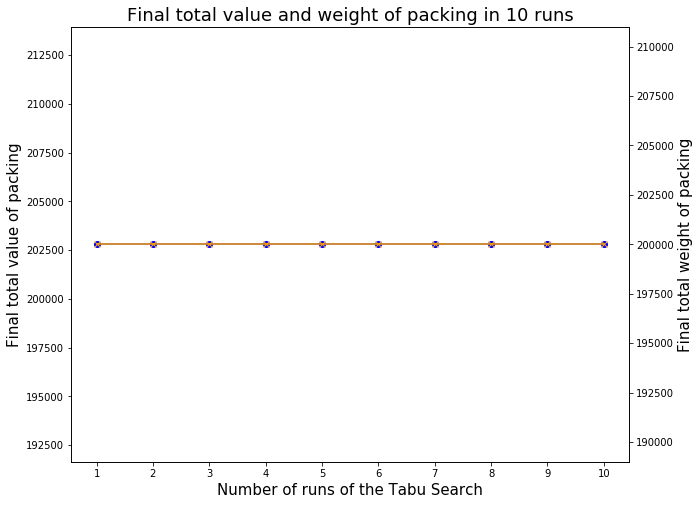


Average total value of packing in 10 runs = 202793.0 

Average total weight of packing in 10 runs = 199996.0 


In [18]:
graphGenerator(arrVal, arrWei, name, runNums)